# Effective TCRE

Here we examine the effective TCRE used in our simulations. For questions about this notebook, please contact Zebedee Nicholls <zebedee.nicholls@climate-energy-college.org>.

In [1]:
import os.path
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scmdata import ScmRun
sys.path.append('..')
from utils import process_temperature_data

<IPython.core.display.Javascript object>

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
magicc_output_file = os.path.join(
    '..','output',
#     'magicc_output_2021-05-18.csv'
#     'magicc_output_2021-06-03.csv'
#     'magicc_output_2021-06-04.csv'
    'magicc_output_2021-06-05.csv'
)

In [4]:
magicc_data = ScmRun(
    magicc_output_file
)#.drop_meta("Unnamed: 0")
magicc_data

<scmdata.ScmRun (timeseries: 69600, timepoints: 336)>
Time:
	Start: 1765-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      climate_model        model region  run_id  \
	0           MAGICC6  unspecified  World       0   
	1           MAGICC6  unspecified  World       0   
	2           MAGICC6  unspecified  World       0   
	3           MAGICC6  unspecified  World       0   
	4           MAGICC6  unspecified  World       1   
	...             ...          ...    ...     ...   
	69595       MAGICC6  unspecified  World   17398   
	69596       MAGICC6  unspecified  World   17399   
	69597       MAGICC6  unspecified  World   17399   
	69598       MAGICC6  unspecified  World   17399   
	69599       MAGICC6  unspecified  World   17399   
	
	                                       scenario          todo           unit  \
	0                                    bp_BAU_qrw  not_relevant      Gt C / yr   
	1                                    bp_BAU_qrw  not_relevant  Gt CO2eq / yr   
	2         

In [5]:
total_co2 = magicc_data.filter(variable="Emissions|CO2|MAGICC AFOLU").add(
    magicc_data.filter(variable="Emissions|CO2|MAGICC Fossil and Industrial"),
    op_cols={"variable": "Emissions|CO2"}
)

total_co2

<scmdata.ScmRun (timeseries: 17400, timepoints: 336)>
Time:
	Start: 1765-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      climate_model        model region  run_id  \
	0           MAGICC6  unspecified  World       0   
	1           MAGICC6  unspecified  World       1   
	2           MAGICC6  unspecified  World       2   
	3           MAGICC6  unspecified  World       3   
	4           MAGICC6  unspecified  World       4   
	...             ...          ...    ...     ...   
	17395       MAGICC6  unspecified  World   17395   
	17396       MAGICC6  unspecified  World   17396   
	17397       MAGICC6  unspecified  World   17397   
	17398       MAGICC6  unspecified  World   17398   
	17399       MAGICC6  unspecified  World   17399   
	
	                                       scenario          todo  \
	0                                    bp_BAU_qrw  not_relevant   
	1                                    bp_BAU_qrw  not_relevant   
	2                                    bp_BAU_qrw  not_re

In [6]:
temp_unit = "K"
co2_unit = "TtC"

<scmdata.ScmRun (timeseries: 17400, timepoints: 336)>
Time:
	Start: 1765-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      climate_model        model region  run_id  \
	0           MAGICC6  unspecified  World       0   
	1           MAGICC6  unspecified  World       1   
	2           MAGICC6  unspecified  World       2   
	3           MAGICC6  unspecified  World       3   
	4           MAGICC6  unspecified  World       4   
	...             ...          ...    ...     ...   
	17395       MAGICC6  unspecified  World   17395   
	17396       MAGICC6  unspecified  World   17396   
	17397       MAGICC6  unspecified  World   17397   
	17398       MAGICC6  unspecified  World   17398   
	17399       MAGICC6  unspecified  World   17399   
	
	                                       scenario          todo unit  \
	0                                    bp_BAU_qrw  not_relevant  TtC   
	1                                    bp_BAU_qrw  not_relevant  TtC   
	2                                    bp_

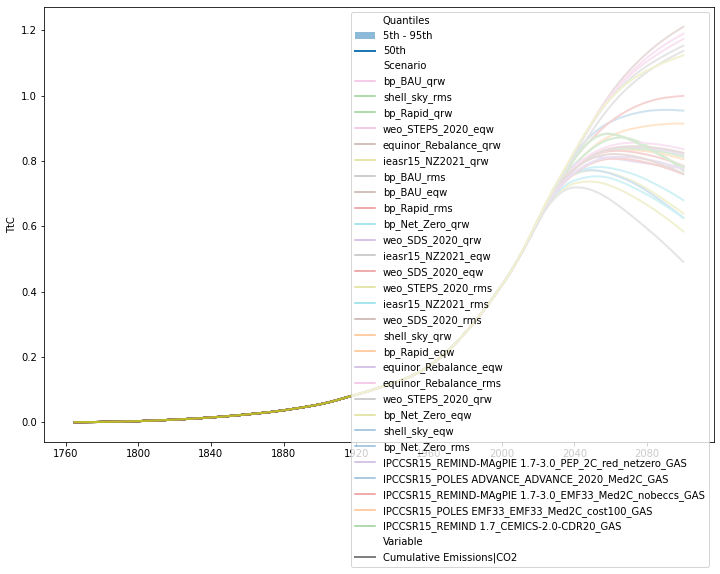

In [7]:
cumulative_co2 = total_co2.integrate().convert_unit(co2_unit)
cumulative_co2.plumeplot(quantile_over="run_id")
cumulative_co2

In [8]:
temperatures, _ = process_temperature_data(
    magicc_data
    .filter(variable="Surface Temperature")
)
temperatures = temperatures.convert_unit(temp_unit)

In [9]:
pdf = cumulative_co2.append(temperatures)
pdf = (
    pdf
    .timeseries(
        time_axis="year", 
        meta=[
            "climate_model", 
            "model", 
            "region", 
            "run_id", 
            "scenario", 
            "variable"
        ]
    )
    .unstack("variable")
    .stack("time")
    .reset_index()
)
pdf

variable climate_model        model region  run_id  \
0              MAGICC6  unspecified  World       0   
1              MAGICC6  unspecified  World       0   
2              MAGICC6  unspecified  World       0   
3              MAGICC6  unspecified  World       0   
4              MAGICC6  unspecified  World       0   
...                ...          ...    ...     ...   
5846395        MAGICC6  unspecified  World   17399   
5846396        MAGICC6  unspecified  World   17399   
5846397        MAGICC6  unspecified  World   17399   
5846398        MAGICC6  unspecified  World   17399   
5846399        MAGICC6  unspecified  World   17399   

variable                                  scenario  time  \
0                                       bp_BAU_qrw  1765   
1                                       bp_BAU_qrw  1766   
2                                       bp_BAU_qrw  1767   
3                                       bp_BAU_qrw  1768   
4                                       bp_BAU_qrw  1769   
...                                            ...   ...   
5846395   IPCCSR15_REMIND 1.7_CEMICS-2.0-CDR20_GAS  2096   
5846396   IPCCSR15_REMIND 1.7_CEMICS-2.0-CDR20_GAS  2097   
5846397   IPCCSR15_REMIND 1.7_CEMICS-2.0-CDR20_GAS  2098   
5846398   IPCCSR15_REMIND 1.7_CEMICS-2.0-CDR20_GAS  2099   
5846399   IPCCSR15_REMIND 1.7_CEMICS-2.0-CDR20_GAS  2100   

variable  Cumulative Emissions|CO2  Surface Temperature  
0                         0.000000            -0.088434  
1                         0.000005            -0.052310  
2                         0.000016            -0.031702  
3                         0.000031            -0.015807  
4                         0.000050            -0.009914  
...                            ...                  ...  
5846395                   0.787093             1.424702  
5846396                   0.782725             1.414779  
5846397                   0.778291             1.404715  
5846398                   0.773781             1.394512  
5846399                   0.769193             1.386945  

[5846400 rows x 8 columns]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4972046340>,
  <matplotlib.lines.Line2D at 0x7f497e6ad790>])

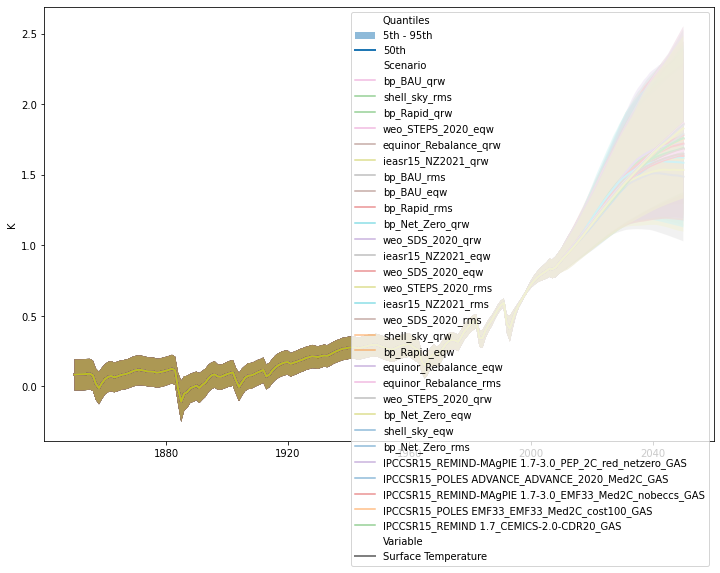

In [10]:
(
    temperatures
    .filter(year=range(1850, 2050 + 1))
    .plumeplot(quantile_over="run_id")
)

(0.5, 2.5)

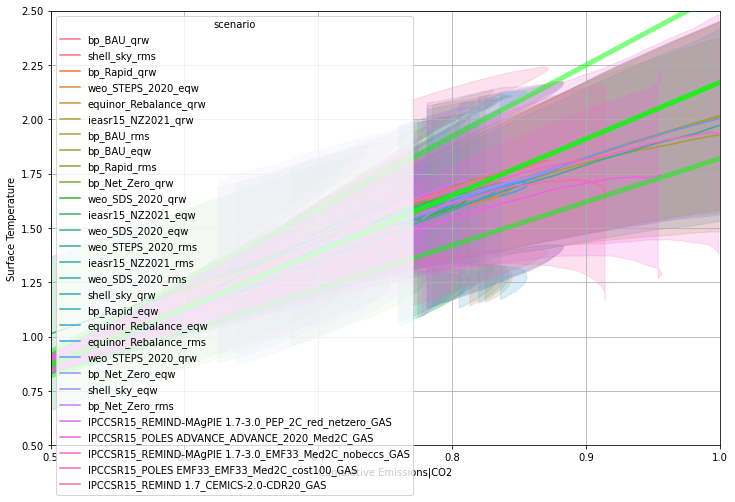

In [11]:
ax = sns.lineplot(
    data=pdf,
    x="Cumulative Emissions|CO2",
    y="Surface Temperature",
    hue="scenario",
    ci="sd",
    estimator="median",
    sort=False,
)
x = np.array([0.4, 1.0])
ax.plot(x, 3.3 * (x - 0.5) + 0.93, linewidth=5, alpha=0.5, color="lime")
ax.plot(x, 2.6 * (x - 0.5) + 0.87, linewidth=5, alpha=0.8, color="lime")
ax.plot(x, 2.0 * (x - 0.5) + 0.82, linewidth=5, alpha=0.5, color="lime")
# ax.plot(x, 1.7 * (x - 0.5) + 0.87, linewidth=5, alpha=0.5)
ax.grid()
ax.set_xlim([0.5, 1.0])
ax.set_ylim([0.5, 2.5])